# Bar Chart Examples

This notebook contains examples of how to use the datachart package to create bar charts.
The examples sequentially build on each other, going from simple to complex.

The bar charts are created using the `bar_chart` function found in the `charts` package. Let's import it:

In [1]:
import random
from datachart import bar_chart

The `bar_chart` function is that accepts a `dict` object containing the chart attributes, as shown in the following examples.

NOTE: To avoid double figure generation, the `line_chart` function is preceded by the `_ =` operator. The double figures are generated because `line_chart` returns the `plt.Figure` object, which is then used to save the figure locally.

# Basic bar chart

To create a basic bar chart simply pass `dict` object containing only the `charts` attribute. The `charts` attribute value is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "data": [{                                         # A list of bar data points
    "label": str,                                    # The x-axis value
    "y":     Union[int, float],                      # The y-axis value
    "yerr":  Optional[Union[int, float]]             # The y-axis error value
  }],
  "style": {                                         # The style of the bar (optional)
    "plot.bar.color":       Union[str, None],        # The color of the bar
    "plot.bar.alpha":       Union[float, None],      # The alpha of the bar
    "plot.bar.width":       Union[int, float, None], # The width of the bar
    "plot.bar.zorder":      Union[int, float, None], # The z-order of the bar
    "plot.bar.hatch":       Union[Hatch, None],      # The hatch style of the bar
    "plot.bar.edge.width":  Union[int, float, None], # The edge line width of the edge
    "plot.bar.edge.color":  Union[str, None],        # The edge line color
    "plot.bar.error.color": Union[str, None],        # The error line color
  },
  "subtitle": Optional[str],                         # The title of the chart
  "xlabel":   Optional[str],                         # The x-axis label
  "ylabel":   Optional[str],                         # The y-axis label

  "vlines": Optional[Union[dict, None]],             # the vertical lines
  "hlines": Optional[Union[dict, None]],             # the horizontal lines
}
```

## Draw only the bar chart

The following example shows how only the `charts["data"]` attribute is required to draw the bar chart.

In [2]:
NUM_OF_POINTS = 10

In [3]:
charts = {
    "data": [
        {"label": f"xx{id}", "y": 100 * (id + 1) * random.random()}
        for id in range(NUM_OF_POINTS)
    ],
}

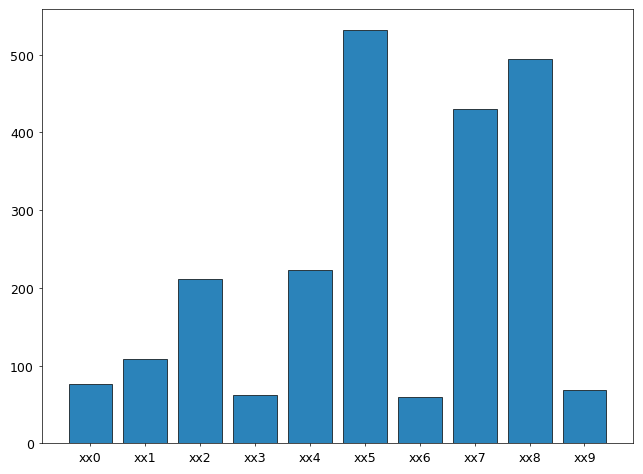

In [4]:
_ = bar_chart(
    {
        "charts": charts,
    }
)

## Add the title and the x and y labels

Adding the `title`, `xlabel` and `ylabel` attributes is straightforward.

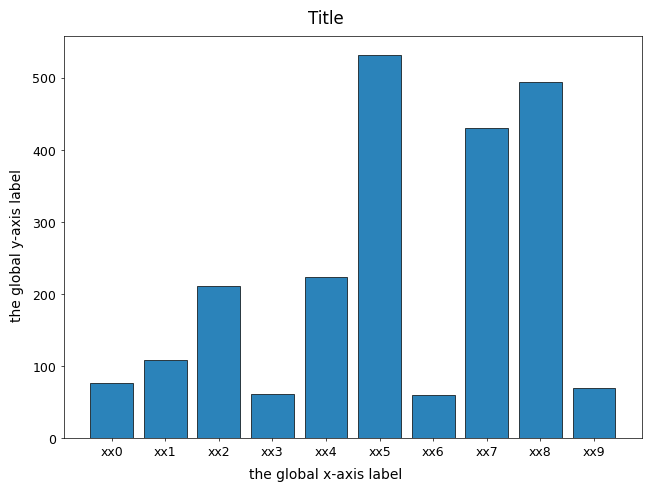

In [5]:
_ = bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
    }
)

## Changing the figure size and adding the grid

To change the figure size, simply add the `figsize` attribute. The `figsize` attribute can be a tuple (width, height), values are in inches. There are some predefined `Figsize` constants in the `constants` package, to make it easier to use.

To add the grid, simply add the `show_grid` attribute. Possible options are:
- `"both"`: shows both the x-axis and the y-axis gridlines
- `"x"`: shows only the x-axis grid lines
- `"y"`: shows only the y-axis grid lines

In [6]:
from datachart.schema.constants import Figsize

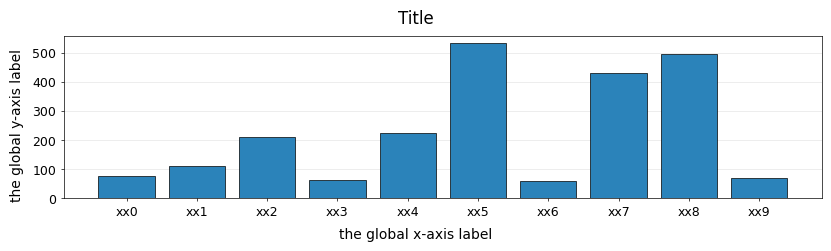

In [7]:
_ = bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,  # must be a tuple (width, height), values are in inches
        "show_grid": "y",  # options: "both", "x", "y"
    }
)

## Changing the bar style

To change a single bar style simply add the `style` attribute with the corresponding attributes. The style attributes are:
- `plot.bar.color`: The color of the bar
- `plot.bar.alpha`: The alpha of the bar
- `plot.bar.width`: The width of the bar
- `plot.bar.zorder`: The z-order of the bar
- `plot.bar.hatch`: The hatch style of the bar
- `plot.bar.edge.width`: The edge line width of the edge
- `plot.bar.edge.color`: The edge line color
- `plot.bar.error.color`: The error line color

Again, to help with the style settings, some constants are defined in the `constants` package, such as:
- `Hatch`: The hatch style of the bar

In [8]:
from datachart.schema.constants import Hatch, LineStyle

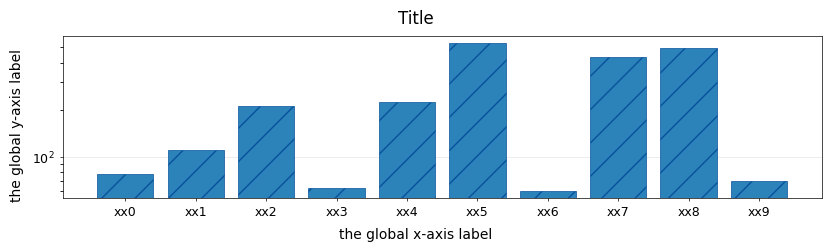

In [9]:
_ = bar_chart(
    {
        "charts": {
            "data": charts["data"],
            "style": {  # define the style of the bars
                "plot.bar.hatch": Hatch.DIAGONAL,
                "plot.bar.edge.width": 0.5,
                "plot.bar.edge.color": "#08519c",
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "show_grid": "y",
        "log_scale": True,
    }
)

## Changing the orientation

To change the orientation of the bars, simply add the `orientation` attribute. Possible options are:
- `"horizontal"`: the bars are horizontal
- `"vertical"`: the bars are vertical

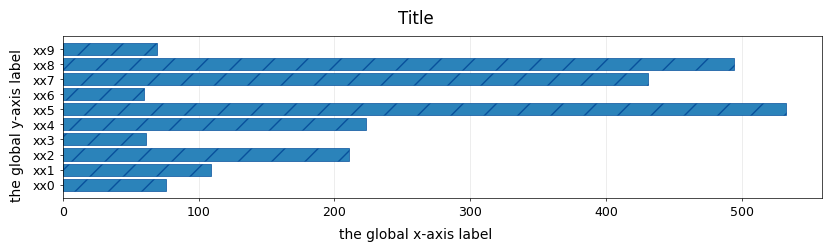

In [10]:
_ = bar_chart(
    {
        "charts": {
            "data": charts["data"],
            "style": {
                "plot.bar.hatch": Hatch.DIAGONAL,
                "plot.bar.edge.width": 0.5,
                "plot.bar.edge.color": "#08519c",
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "show_grid": "x",  # change the grid to match the change in orientation
        "orientation": "horizontal",  # options: "horizontal", "vertical"
    }
)

## Adding vertical and horizontal lines

To add vertical and horizontal lines, you need to do the following steps:

**Adding vertical lines.** Within the `charts` dictionary, define the attribute `vlines`, which is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "x":    Union[int, float],                 # The x-axis value (values are bar indices, e.g. 0, 1, 2, etc.)
  "ymin": Optional[Union[int, float]],       # The minimum y-axis value
  "ymax": Optional[Union[int, float]],       # The maximum y-axis value
  "style": {                                 # The style of the line (optional)
    "plot.vline.color": Optional[str],       # The color of the line (hex color code)
    "plot.vline.style": Optional[LineStyle], # The line style (solid, dashed, etc.)
    "plot.vline.width": Optional[float],     # The width of the line
    "plot.vline.alpha": Optional[float],     # The alpha of the line (how visible the line is)
  },
  "label": Optional[str],                    # The label of the line
}
```

**Adding horizontal lines.** Within the `charts` dictionary, define the attribute `hlines`, which is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "y":    Union[int, float],                 # The y-axis value
  "xmin": Optional[Union[int, float]],       # The minimum x-axis value  (values are bar indices, e.g. 0, 1, 2, etc.)
  "xmax": Optional[Union[int, float]],       # The maximum x-axis value  (values are bar indices, e.g. 0, 1, 2, etc.)
  "style": {                                 # The style of the line (optional)
    "plot.hline.color": Optional[str],       # The color of the line (hex color code)
    "plot.hline.style": Optional[LineStyle], # The line style (solid, dashed, etc.)
    "plot.hline.width": Optional[float],     # The width of the line
    "plot.hline.alpha": Optional[float],     # The alpha of the line (how visible the line is)
  },
  "label": Optional[str],                    # The label of the line
}
```


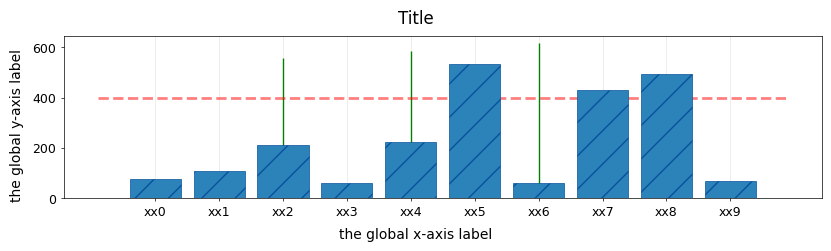

In [11]:
_ = bar_chart(
    {
        "charts": {
            "data": charts["data"],
            "style": {
                "plot.bar.hatch": Hatch.DIAGONAL,
                "plot.bar.edge.width": 0.5,
                "plot.bar.edge.color": "#08519c",
            },
            "vlines": [
                {
                    "x": 2 * i,
                    "style": {
                        "plot.vline.color": "green",
                        "plot.vline.style": LineStyle.SOLID,
                        "plot.vline.width": 1,
                    },
                }
                for i in range(1, 4)
            ],
            "hlines": {
                "y": 400,
                "style": {
                    "plot.hline.color": "red",
                    "plot.hline.style": LineStyle.DASHED,
                    "plot.hline.width": 2,
                    "plot.hline.alpha": 0.5,
                },
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "show_grid": "x",  # change the grid to match the change in orientation
    }
)

# Multiple bar charts

To add multiple bar charts, simply add the `charts` attribute with a list of charts, as shown below.

In [12]:
charts = [
    {
        "data": [
            {"label": f"xx{id}", "y": 100 * (id + 1) * random.random(), "yerr": 30}
            for id in range(NUM_OF_POINTS)
        ],
        "style": {
            "plot.bar.error.color": "#000000",
        },
        "subtitle": f"Bars {id}",
    }
    for id in range(2)
]

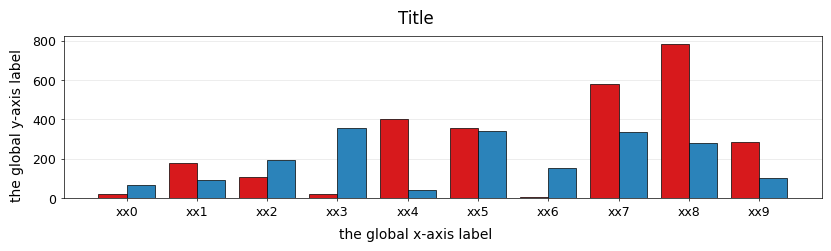

In [13]:
_ = bar_chart(
    {
        # use a list of charts to define multiple bars
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "show_grid": "y",
    }
)

## Add a subtitle to each chart

To add a subtitle to each bar chart, simply add the `subtitle` attribute to each required chart. In addition, to help with discerning which chart is which, use the `show_legend` attribute to show the legend of the charts.

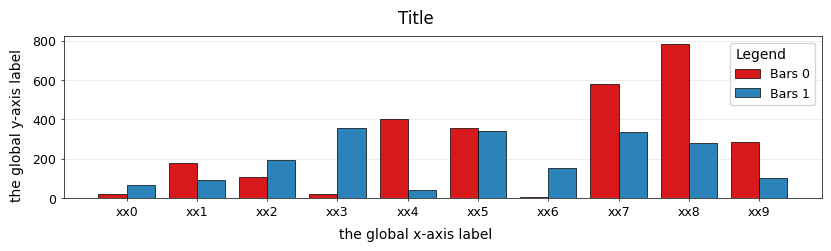

In [14]:
_ = bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "show_grid": "y",
        "show_legend": True,  # show the legend
    }
)

## Show each chart in its own subplot

To draw multiple charts in each subplot, simply add the `subplots` attribute. The chart `subtitles` are then added at the top of each subplot, while the `title`, `xlabel` and `ylabel` are positioned to be common to all charts.

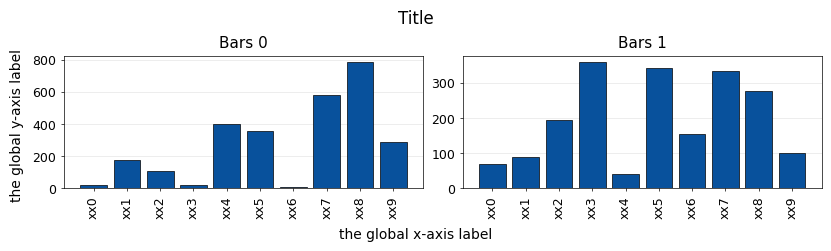

In [15]:
_ = bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True,  # show charts as subplots
        "show_grid": "y",
        # "show_legend": True, # show_legend is not supported
    }
)

## Sharing the x-axis and/or y-axis across subplots

To share the x-axis and/or y-axis across subplots, simply add the `sharex` and/or `sharey` attributes.

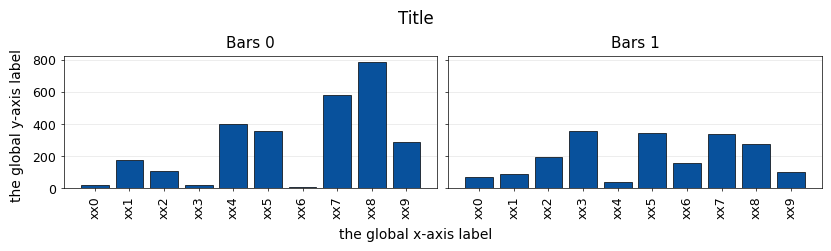

In [16]:
_ = bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True,  # show charts as subplots
        "sharex": True,  # share the x-axis across subplots
        "sharey": True,  # share the y-axis across subplots
        "show_grid": "y",
    }
)

## Changing the orientation for all subplots

The `orientation` attribute can be used to change the orientation of all subplots.

## Changing the orientation for all subplots

The `orientation` attribute can be used to change the orientation of all subplots.

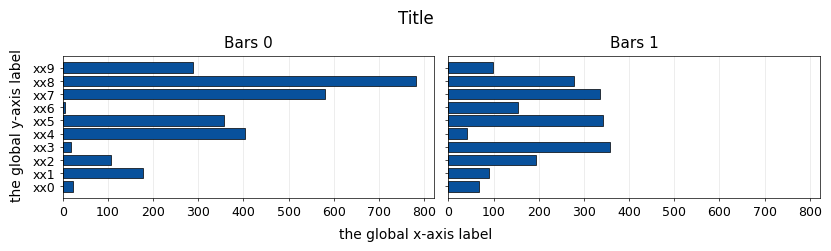

In [17]:
_ = bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_1_ROWS,
        "subplots": True,
        "sharex": True,
        "sharey": True,
        "show_grid": "x",
        "orientation": "horizontal",  # options: "horizontal", "vertical"
    }
)

## Adding error bars to each bar

To add error bars to each bar chart, first define the `yerr` in the `data` attribute **[as shown in cell 10]**. Afterwards, add the `show_yerr` attribute.

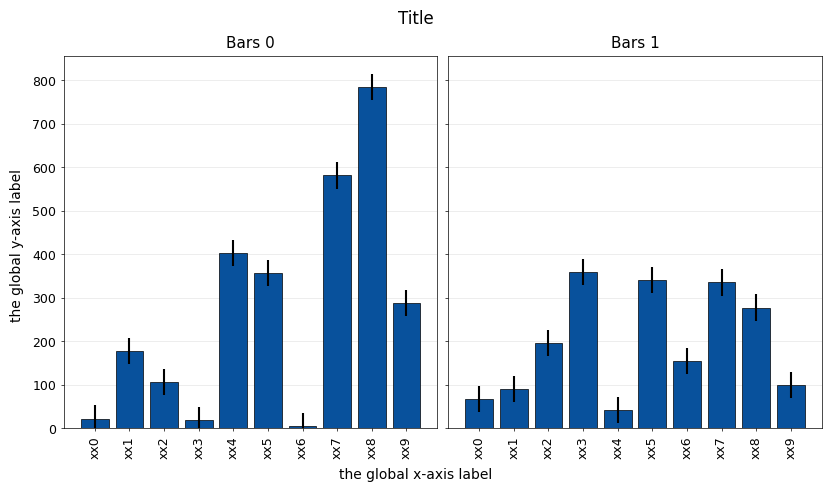

In [18]:
_ = bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_2_ROWS,
        "subplots": True,  # show charts as subplots
        "sharex": True,
        "sharey": True,
        "show_grid": "y",
        "show_yerr": True,
        "y_min": 0,
    }
)

## Log scale the y-axis

To use the log scale for the y-axis, simply add the `log_scale` attribute.

NOTE: The figure below will be saved as an image in the following section.

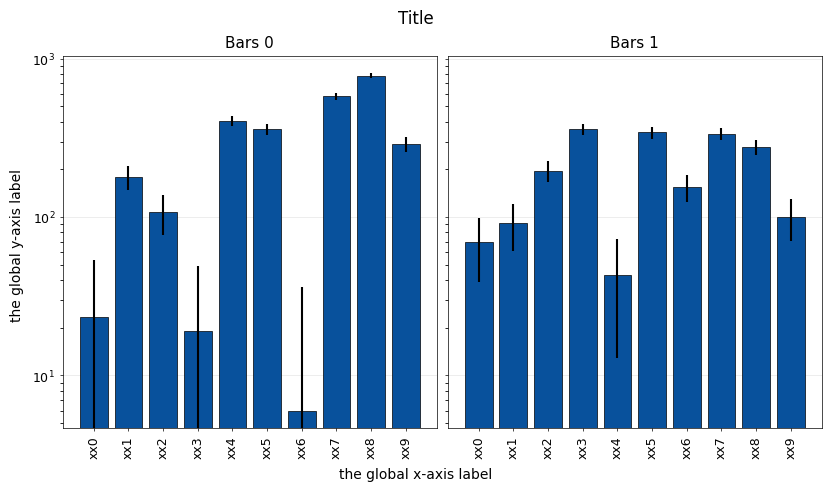

In [19]:
figure = bar_chart(
    {
        "charts": charts,
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": Figsize.A4_2_ROWS,
        "subplots": True,  # show charts as subplots
        "sharex": True,
        "sharey": True,
        "show_grid": "y",
        "show_yerr": True,
        "log_scale": True,
    }
)

# Saving the chart as an image

To save the chart as an image, use the `save_figure` function, found in the `utils.figure` module.

In [20]:
from datachart.utils import save_figure

In [21]:
save_figure(figure, "./fig_bar_chart.png", dpi=300)